In [4]:
#import Libraries
import pandas as pd
import glob
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
import numpy as np

# read data 

In [25]:
data=pd.read_csv("data.csv")
data=data.drop(data.columns[[0]], axis=1)

In [26]:
data

,model,year,price,mileage,tax,mpg,engineSize,company,Manual,Semi-Auto,Diesel,Petrol
0,84,12,1.316125,-0.453634,0.581782,-0.066129,2.0,10,0,0,1,0
1,84,12,1.580379,-0.907973,0.581782,-0.066129,2.0,10,0,0,1,0
2,84,12,0.614442,-0.769269,0.581782,-0.026136,2.0,10,1,0,1,0
3,84,12,2.507864,-0.895183,0.581782,-0.920980,2.0,10,0,0,0,1
4,84,12,1.021418,-0.813721,0.657290,-0.556044,1.5,10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101526,7,13,0.193292,-0.934430,0.581782,-0.066129,1.0,0,1,0,0,1
101527,7,13,0.193292,-1.033644,0.657290,-0.066129,1.0,0,1,0,0,1
101528,7,13,0.221359,-1.100224,0.657290,-0.066129,1.0,0,1,0,0,1
101529,71,10,0.544134,-0.709352,0.657290,-0.151115,1.4,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           108540 non-null  int64  
 7   mpg           108540 non-null  float64
 8   engineSize    108540 non-null  float64
 9   company       108540 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.3+ MB


# clean data

clean price

# features selection

/Users/chhoemsothy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


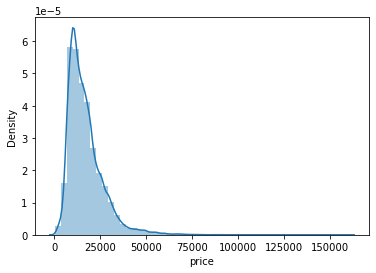

In [6]:
sns.distplot(data['price']);

In [7]:
print(data['price'].describe(),"\n")

count    108540.000000
mean      16890.124046
std        9756.266820
min         450.000000
25%       10229.500000
50%       14698.000000
75%       20940.000000
max      159999.000000
Name: price, dtype: float64 



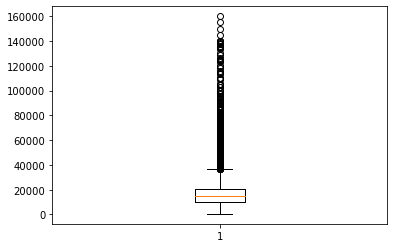

In [8]:
plt.boxplot(data.price)
plt.show()

In [9]:
#remove data over price max
Q1 = np.percentile(data['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

data_price_max = Q3+1.5*IQR
data = data.drop(data[data.price>=data_price_max].index)
data.shape

(104642, 10)

/Users/chhoemsothy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


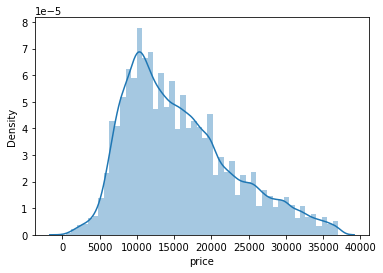

In [10]:
sns.distplot(data['price']);

In [11]:
print(data['price'].describe(),"\n")

count    104642.000000
mean      15690.204736
std        7232.000105
min         450.000000
25%        9999.000000
50%       14295.000000
75%       19990.000000
max       37000.000000
Name: price, dtype: float64 



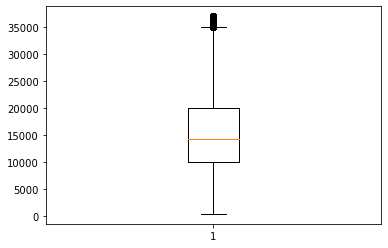

In [12]:
plt.boxplot(data.price)
plt.show()

Which column affects the price the most?

In [13]:
data.corr()['price'].sort_values(ascending=False)

price         1.000000
year          0.547442
engineSize    0.517082
tax           0.253409
mpg          -0.191266
mileage      -0.460428
Name: price, dtype: float64

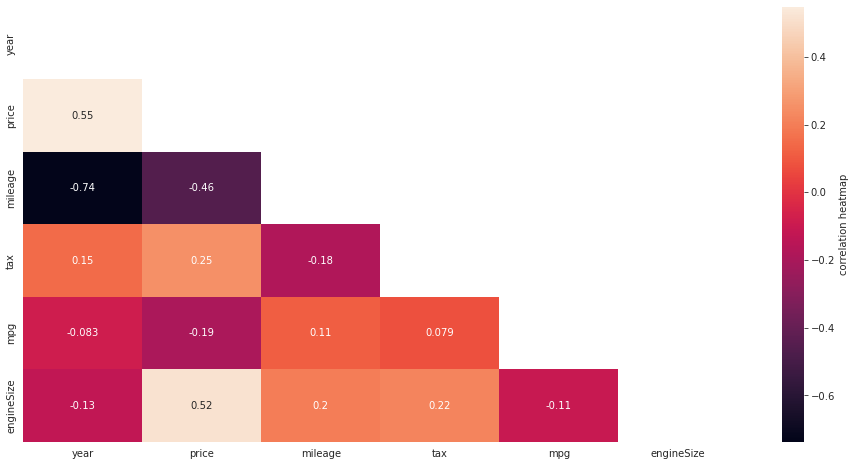

In [14]:
corr  = data.corr()
f = plt.figure(figsize = (16,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(corr, annot=True, mask=mask, cbar_kws={'label': 'correlation heatmap'})

its year , engineSize , mileage

I wonder what companies have more average prices?

In [15]:
d=pd.DataFrame(data.groupby('company').mean().sort_values(by='price',ascending=False)['price'])
d

,price
company,
cclass,22307.970372
merc,21668.876314
audi,20263.972317
bmw,20139.419004
vw,16311.211121
skoda,14251.377455
focus,13569.880961
hyundi,12716.491351
toyota,12293.935754


 cclass , merc , audi and bmw has max prices

But now we want to know what is the relationship between mileage and Price ?

Text(0, 0.5, 'Price')

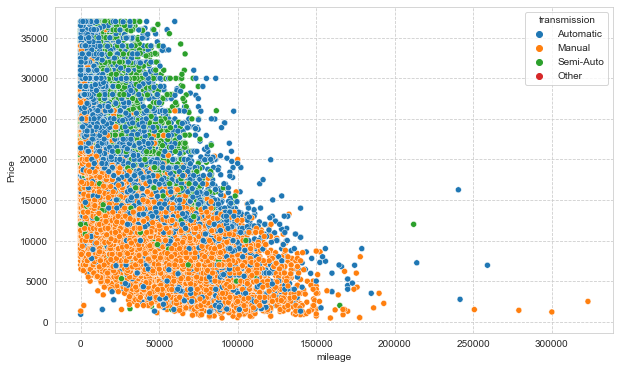

In [16]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "mileage", y = "price", data = data,hue='transmission')
plt.xlabel("mileage")
plt.ylabel("Price")

Now we know that from 0 to 50,000 for the mileage the price is not affected significantly,
but if it get higher then 50,000 mileage than the car have lower price
and the highest prices for the automatic cars then the semi_auto then the manual

we have small outlier we will remove

In [17]:
data = data.drop(data[data.mileage>=155000].index)

Let's look again

Text(0, 0.5, 'Price')

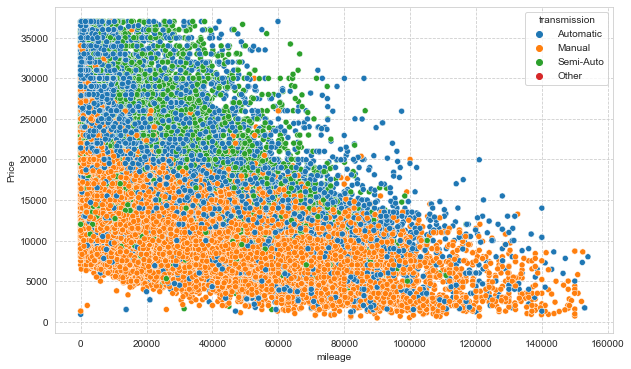

In [18]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "mileage", y = "price", data = data,hue='transmission')
plt.xlabel("mileage")
plt.ylabel("Price")

In [19]:
data.shape

(104599, 10)

plot transmission , fuelType and what is the relationship between them?

/Users/chhoemsothy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chhoemsothy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/xr/88q546v54h3gbyt_kn30lbk80000gn/T/ipykernel_81546/1986330697.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


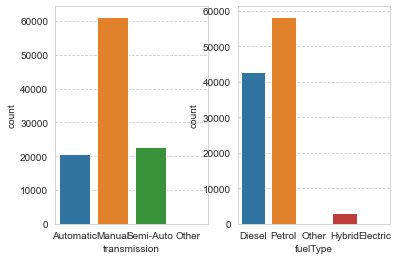

In [20]:
fig, ax =plt.subplots(1,2)
sns.countplot(data["transmission"],ax=ax[0])
sns.countplot(data["fuelType"],ax=ax[1])
fig.show()

count transmistion

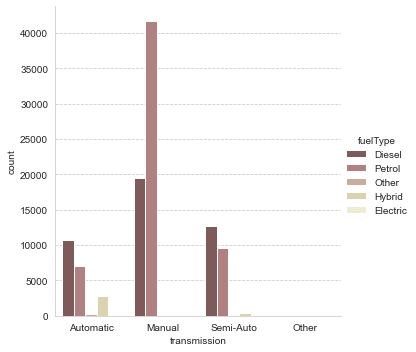

In [21]:
sns.catplot(x="transmission", kind="count",hue = 'fuelType', palette="pink", data=data)

now we know that 
- most car is manual and use petrol
- most semi auto cars use diesel
- most auto cars use diesel also

price and transmission relationship

/Users/chhoemsothy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='price'>

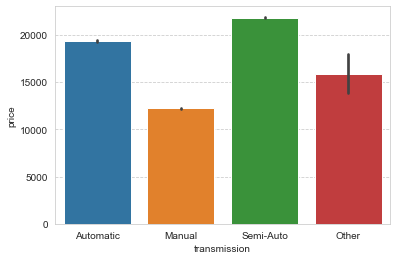

In [22]:
sns.barplot(data["transmission"], data["price"])

In [23]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,vw
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,vw
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,vw
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,vw
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,vw


lets look at engineSize

/Users/chhoemsothy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


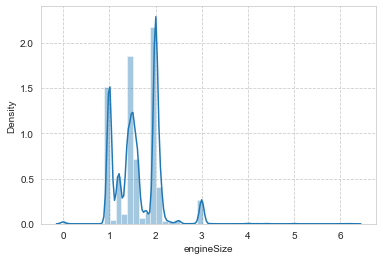

In [24]:
sns.distplot(data['engineSize']);

In [25]:
print(data["engineSize"].value_counts())
print(data["engineSize"].unique())
print("-"*40)

2.0    28641
1.0    19924
1.5    13421
1.4    11027
1.6     9456
1.2     6962
2.1     5376
3.0     3391
1.8     1753
1.3     1372
1.7      910
1.1      567
2.2      441
2.5      432
0.0      271
2.3      252
2.4       71
4.0       63
4.4       36
2.9       33
5.0       31
3.2       28
1.9       24
6.2       21
3.5       21
4.2       21
2.8       13
2.7       10
5.5        7
4.7        7
0.6        7
5.4        3
4.1        2
6.0        1
3.7        1
2.6        1
5.2        1
6.3        1
Name: engineSize, dtype: int64
[2.  1.5 1.  1.6 0.  1.4 3.2 1.2 1.9 1.8 2.5 3.  1.3 1.7 1.1 2.2 2.8 2.4
 4.2 2.1 3.5 2.9 6.2 4.  2.3 5.5 4.7 5.  2.7 5.4 6.  3.7 2.6 0.6 4.4 4.1
 5.2 6.3]
----------------------------------------


it has outlier so we will remove the less frequent times because this will help the model to predict better¶


/Users/chhoemsothy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


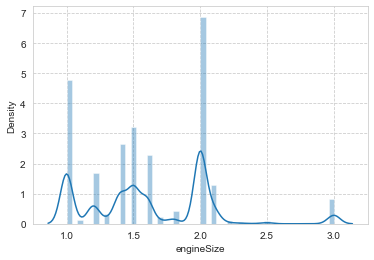

In [26]:
data = data.drop(data[data.engineSize<1].index)
data = data.drop(data[data.engineSize>3].index)
sns.distplot(data['engineSize']);

In [27]:
data.shape

(104077, 10)

lets look at year , model , transmission , and fuelType ....... and we will do the same like engineSiz

In [28]:
print(data["year"].value_counts())
print(data["year"].unique())
print("-"*40)

2019    27456
2017    23363
2016    16813
2018    14696
2015     8271
2014     4327
2020     3832
2013     2791
2012      692
2011      472
2010      353
2009      316
2008      224
2007      175
2006       82
2005       75
2004       41
2002       31
2003       31
2001       13
1998        6
2000        6
1999        5
1997        2
1996        2
1970        1
2060        1
Name: year, dtype: int64
[2019 2020 2018 2017 2015 2016 2013 2014 2009 2010 2012 2011 2008 2000
 2006 2002 2005 2004 2007 2001 2003 1997 1970 1999 1998 1996 2060]
----------------------------------------


In [29]:
print(len(data["model"].unique()))
print(data["model"].value_counts())
print(data["model"].unique())
print("-"*40)

177
 Focus      10013
 C Class     7155
 Fiesta      6538
 Golf        4850
 Corsa       3435
            ...  
 Accent         1
200             1
220             1
180             1
 A2             1
Name: model, Length: 177, dtype: int64
[' T-Roc' ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' Up'
 ' Scirocco' ' Beetle' ' Caddy Maxi Life' ' Caravelle' ' Touareg'
 ' Arteon' ' Touran' ' Golf SV' ' Amarok' ' Tiguan Allspace' ' Shuttle'
 ' Jetta' ' CC' ' Caddy Life' ' Caddy' ' Caddy Maxi' ' Eos' ' Fox'
 ' Corsa' ' Astra' ' Viva' ' Mokka' ' Mokka X' ' Crossland X' ' Zafira'
 ' Meriva' ' Zafira Tourer' ' Adam' ' Grandland X' ' Antara' ' Insignia'
 ' Ampera' ' GTC' ' Combo Life' ' Vivaro' ' Cascada' ' Kadjar' ' Agila'
 ' Tigra' ' Vectra' ' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo'
 ' C-HR' ' Prius' ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO'
 ' Land Cruiser' ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser' ' Octavia'
 ' Citigo' ' Yeti Outdoor' ' Superb' ' Kodiaq' ' Rapid' '

In [30]:
print(len(data["model"].unique()))
print(data["model"].value_counts())
print(data["model"].unique())
print("-"*40)

177
 Focus      10013
 C Class     7155
 Fiesta      6538
 Golf        4850
 Corsa       3435
            ...  
 Accent         1
200             1
220             1
180             1
 A2             1
Name: model, Length: 177, dtype: int64
[' T-Roc' ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' Up'
 ' Scirocco' ' Beetle' ' Caddy Maxi Life' ' Caravelle' ' Touareg'
 ' Arteon' ' Touran' ' Golf SV' ' Amarok' ' Tiguan Allspace' ' Shuttle'
 ' Jetta' ' CC' ' Caddy Life' ' Caddy' ' Caddy Maxi' ' Eos' ' Fox'
 ' Corsa' ' Astra' ' Viva' ' Mokka' ' Mokka X' ' Crossland X' ' Zafira'
 ' Meriva' ' Zafira Tourer' ' Adam' ' Grandland X' ' Antara' ' Insignia'
 ' Ampera' ' GTC' ' Combo Life' ' Vivaro' ' Cascada' ' Kadjar' ' Agila'
 ' Tigra' ' Vectra' ' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo'
 ' C-HR' ' Prius' ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO'
 ' Land Cruiser' ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser' ' Octavia'
 ' Citigo' ' Yeti Outdoor' ' Superb' ' Kodiaq' ' Rapid' '

In [31]:
print(data["transmission"].value_counts())
print(data["transmission"].unique())
print("-"*40)
print(data["fuelType"].value_counts())
print(data["fuelType"].unique())
print("-"*40)

Manual       61070
Semi-Auto    22545
Automatic    20453
Other            9
Name: transmission, dtype: int64
['Automatic' 'Manual' 'Semi-Auto' 'Other']
----------------------------------------
Petrol      57946
Diesel      42780
Hybrid       3109
Other         238
Electric        4
Name: fuelType, dtype: int64
['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']
----------------------------------------


In [32]:
data = data[data.groupby('model').model.transform(len) > 100]
data = data.drop(data[data.year<2007].index)
data = data.drop(data[data.transmission=='Other'].index)
data = data.drop(data[data.fuelType=='Other'].index)
data = data.drop(data[data.fuelType=='Electric'].index)
data.shape

(101531, 10)

In [33]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,vw
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,vw
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,vw
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,vw
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,vw
...,...,...,...,...,...,...,...,...,...,...
108535,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,audi
108536,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,audi
108537,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,audi
108538,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,audi


we will replace 0 in mpg (from focus and cclass) companys with th mean

but will set tax as its Because the original data contains 0 in the first place

In [34]:
mean=data['mpg'].mean()
data['mpg'].mask(data['mpg'] == '0', mean, inplace=True)
print(mean)

50.92281864652594


# Other features 

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data.shape

(101531, 10)

In [36]:
le = LabelEncoder()
data['model']=le.fit_transform(data['model'])
data['year']=le.fit_transform(data['year'])
data['company']=le.fit_transform(data['company'])
#to know what is the number of each company 
print(list(le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])))
print(data.info())

['audi', 'bmw', 'cclass', 'focus', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101531 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         101531 non-null  int64  
 1   year          101531 non-null  int64  
 2   price         101531 non-null  int64  
 3   transmission  101531 non-null  object 
 4   mileage       101531 non-null  int64  
 5   fuelType      101531 non-null  object 
 6   tax           101531 non-null  int64  
 7   mpg           101531 non-null  float64
 8   engineSize    101531 non-null  float64
 9   company       101531 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 8.5+ MB
None


In [37]:
dum = pd.get_dummies(data.transmission)
data = pd.concat([data,dum],axis="columns")

data = data.drop(["transmission"],axis="columns")
data = data.drop(["Automatic"],axis="columns")

dum = pd.get_dummies(data.fuelType)
data = pd.concat([data,dum],axis="columns")

data = data.drop(["fuelType"],axis="columns")
data = data.drop(["Hybrid"],axis="columns")

In [38]:
scaler = StandardScaler()
data[['price','tax','mpg','mileage']] = scaler.fit_transform(data[['price','tax','mpg','mileage']]) 

In [39]:
data

,model,year,price,mileage,tax,mpg,engineSize,company,Manual,Semi-Auto,Diesel,Petrol
0,84,12,1.316125,-0.453634,0.581782,-0.066129,2.0,10,0,0,1,0
1,84,12,1.580379,-0.907973,0.581782,-0.066129,2.0,10,0,0,1,0
2,84,12,0.614442,-0.769269,0.581782,-0.026136,2.0,10,1,0,1,0
3,84,12,2.507864,-0.895183,0.581782,-0.920980,2.0,10,0,0,0,1
4,84,12,1.021418,-0.813721,0.657290,-0.556044,1.5,10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
108535,7,13,0.193292,-0.934430,0.581782,-0.066129,1.0,0,1,0,0,1
108536,7,13,0.193292,-1.033644,0.657290,-0.066129,1.0,0,1,0,0,1
108537,7,13,0.221359,-1.100224,0.657290,-0.066129,1.0,0,1,0,0,1
108538,71,10,0.544134,-0.709352,0.657290,-0.151115,1.4,0,0,0,0,1


# Feature Selection

In [40]:
Y =data["price"]
X =data.drop(["price"] ,axis="columns")# all colume but do not price only one 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import linear_model
forest = linear_model.BayesianRidge()
#model=forest
model=forest
model = sfs(model, k_features=9, forward=False, verbose=1, scoring='neg_mean_squared_error')
model.fit(X, Y )
#Show contain 
feat_names = list(model.k_feature_names_)
print(feat_names)
#///// ceate new table 
new_data = data[feat_names]
new_data['price'] = data['price']
new_data.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.2s finished
Features: 10/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
Features: 9/9

['year', 'mileage', 'tax', 'engineSize', 'company', 'Manual', 'Semi-Auto', 'Diesel', 'Petrol']


/var/folders/xr/88q546v54h3gbyt_kn30lbk80000gn/T/ipykernel_81546/1106763865.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['price'] = data['price']


,year,mileage,tax,engineSize,company,Manual,Semi-Auto,Diesel,Petrol,price
0,12,-0.453634,0.581782,2.0,10,0,0,1,0,1.316125
1,12,-0.907973,0.581782,2.0,10,0,0,1,0,1.580379
2,12,-0.769269,0.581782,2.0,10,1,0,1,0,0.614442
3,12,-0.895183,0.581782,2.0,10,0,0,0,1,2.507864
4,12,-0.813721,0.657290,1.5,10,0,1,0,1,1.021418


# split the data

In [41]:
from sklearn.model_selection import train_test_split
y =new_data["price"]
X =new_data.drop(["price"] ,axis="columns")# all colume but do not price only one
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("data is ",new_data.shape)
print("X is ",X.shape)
print("X_train is ",X_train.shape)
print("y_train is ",y_train.shape)
print("X_test is ",X_test.shape)
print("y_test is ",y_test.shape)

data is  (101531, 10)
X is  (101531, 9)
X_train is  (86301, 9)
y_train is  (86301,)
X_test is  (15230, 9)
y_test is  (15230,)


# Regression for car prices

Test on 11 Modle in Regression 

In [42]:
forest = linear_model.BayesianRidge()
#model=forest
model=forest
model.fit(X_train, y_train)

BayesianRidge()

In [43]:
#Calculating Details
print('Linear model Train Score is : ' , model.score(X_train, y_train))
print('Linear model Test Score is  : ' , model.score(X_test, y_test))
print('----------------------------------------------------')

Linear model Train Score is :  0.7720392806771477
Linear model Test Score is  :  0.7716440864900557
----------------------------------------------------


after try some models i found that the beast model is RandomForestRegressor

In [44]:
y_pred = model.predict(X_test)
yt_pred = model.predict(X_train)
print('Predicted Value for Linear Regression is : \n' ,np.around(y_pred[:10],3))
print('real Value for Linear Regression is : \n' ,np.around(np.array(y_test[:10]),3))
#----------------------------------------------------

Predicted Value for Linear Regression is : 
 [ 1.435  0.192 -0.963 -0.067  0.526  1.596 -0.838  1.529 -0.332 -0.417]
real Value for Linear Regression is : 
 [ 1.302  0.46  -0.936 -0.51   0.6    2.409 -1.14   1.201 -0.087 -0.089]


lets try some example

In [45]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)
#----------------------------------------------------
#Calculating Mean Squared Error (the average of the squares of the errors)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is  : ', MSEValue)
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  0.3663092306808286
Mean Squared Error Value is  :  0.22483027796173877
Median Squared Error Value is :  0.2922793471379186


good values for the cost funtion

# show train and test data in the same time

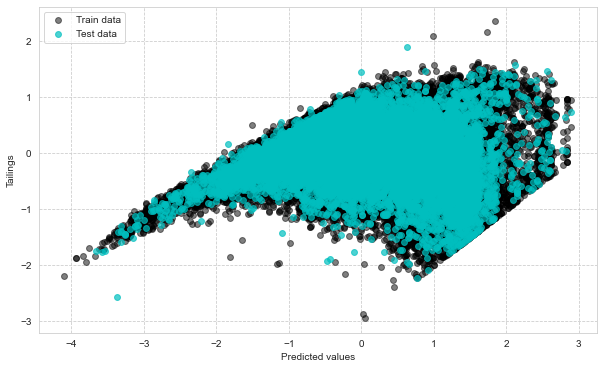

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(yt_pred,yt_pred - y_train,c = 'black', marker = 'o', s = 35, alpha = 0.5,label = 'Train data')
plt.scatter(y_pred,y_pred - y_test, c = 'c', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.show()